### Convolutional neural networks

Multi - Layer Perceptron, MNIST Data
We will do the same steps as we did in the last chapter, the only differnce being this time we will classify 10 different classes. That means output will have 10 logits

Process will be broken down into the following steps:
1. Load and Visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our tained model on a test dataset!

In [1]:
import torch 
import numpy as np

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of supprocess to use for data loading
num_workers =0

# define how many samples per batch to load
batch_size = 20

# define validation size
valid_size = 0.2

# convert data to torch.FloatTensor
transform  = transforms.ToTensor()

# choose training and test dataset
train_data = datasets.MNIST(root='data', train=True, download=True, 
                            transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True,
                          transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
print(split)

train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                sampler = train_sampler,num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                         num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size,
                                          sampler=valid_sampler, num_workers = num_workers)
print("success")

12000
success


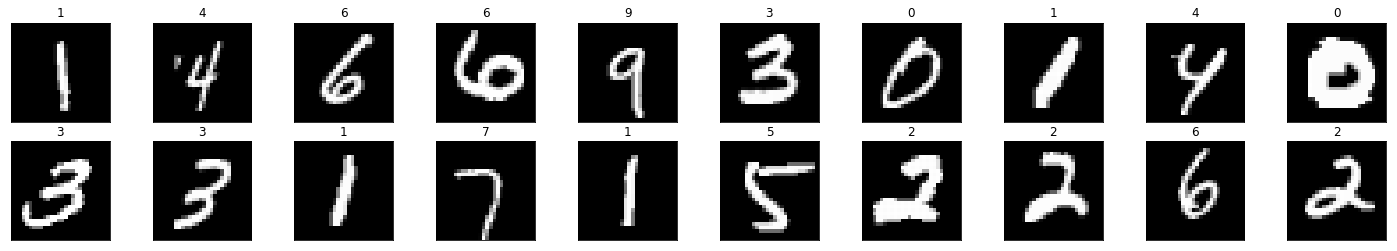

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
images, labels = next(iter(train_loader))
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

### View an image in more detail
Printing the pixel values 

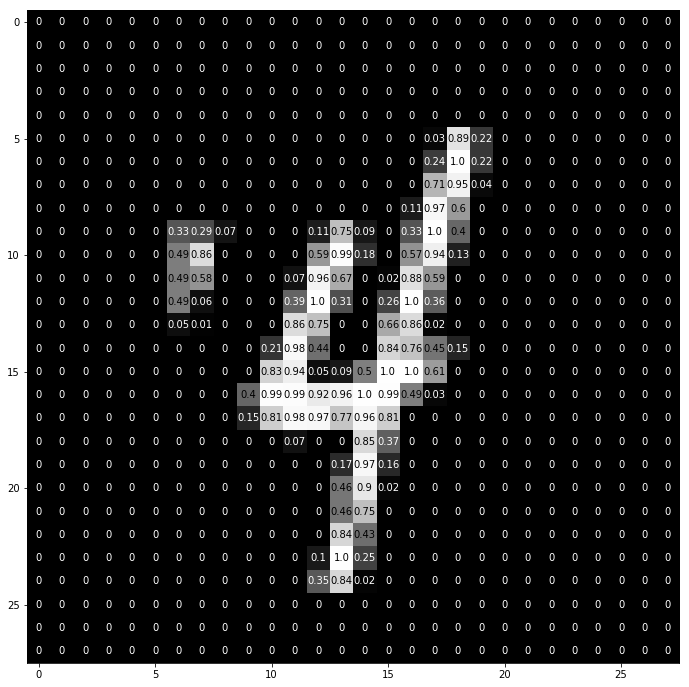

In [4]:

img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

### Define the architecture


In [5]:
import torch.nn as nn
import torch.nn.functional as F

## define the model layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        hidden_layer1 = 512
        hidden_layer2 = 512
        self.fc1 = nn.Linear(28*28, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.fc3 = nn.Linear(hidden_layer2, 10)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        
        # flatten the image
        x = x.view(-1, 28*28)
        # add hidden layer with relu activation function
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # add hidden layer with relu acivation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
## initialize the model
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [6]:
## Specify the loss and optimization functions

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

### Train the network

In [7]:
# number of epochs
n_epochs = 50

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf  # set initial "min" to infinity

for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    ## Train the model
    model.train()
    ## 
    for images, labels in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to model
        output = model(images)
        # calculate the loss
        loss = criterion(output, labels)
        
        loss.backward()
        # perform a single optimizer step
        optimizer.step()
        # update running training loss
        train_loss += loss.item() *images.size(0)
    
    for images, labels in valid_loader:
        output = model(images)
        loss = criterion(output, labels)
        valid_loss += loss.item()*images.size(0)
    
    # print training statistics
    # calculate average loss over an epoch
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_loss = train_loss/len(train_loader.dataset)
    
    
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
            valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.755047
Validation loss decreased (inf --> 0.081289).  Saving model ...
Epoch: 2 	Training Loss: 0.282091
Validation loss decreased (0.081289 --> 0.062349).  Saving model ...
Epoch: 3 	Training Loss: 0.223747
Validation loss decreased (0.062349 --> 0.053027).  Saving model ...
Epoch: 4 	Training Loss: 0.183644
Validation loss decreased (0.053027 --> 0.043917).  Saving model ...
Epoch: 5 	Training Loss: 0.157165
Validation loss decreased (0.043917 --> 0.038840).  Saving model ...
Epoch: 6 	Training Loss: 0.136236
Validation loss decreased (0.038840 --> 0.034961).  Saving model ...
Epoch: 7 	Training Loss: 0.119638
Validation loss decreased (0.034961 --> 0.031242).  Saving model ...
Epoch: 8 	Training Loss: 0.107550
Validation loss decreased (0.031242 --> 0.029524).  Saving model ...
Epoch: 9 	Training Loss: 0.095034
Validation loss decreased (0.029524 --> 0.026689).  Saving model ...
Epoch: 10 	Training Loss: 0.088311
Validation loss decreased (0.026689 --> 0.0

### Load the model with the lowest validation loss


In [10]:
model.load_state_dict(torch.load('model.pt'))

### Test the trained network
Finally, we test our best model on previously unseen test data and evaluate its performance. Testing on unseen data is a good way to check that our model generalizes well. 

In [8]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# model.eval will set all teh layers in your model to evaluation mode. 
# this will affect all layers like dropout layers that turn off nodes during trsaining
# with some probability, but should allow every node to be "on" for evaluation. so, you
# should set your model to evaluation mode before testing or validating your model
# and set it to model.train() only during the training loop

for images, labels in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the mdoel
    output = model(images)
    loss = criterion(output, labels)
    test_loss += loss.item()*images.size(0)
    _, pred = torch.max(output, 1)
    
    correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
    
    for i in range(batch_size):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.061119

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 97% (1011/1032)
Test Accuracy of     3: 98% (993/1010)
Test Accuracy of     4: 98% (964/982)
Test Accuracy of     5: 97% (870/892)
Test Accuracy of     6: 98% (939/958)
Test Accuracy of     7: 97% (999/1028)
Test Accuracy of     8: 97% (949/974)
Test Accuracy of     9: 97% (984/1009)

Test Accuracy (Overall): 98% (9807/10000)


### Visualize sample test results
This cell displays test images and their labels in this format: predicted (ground-truth). The test will be green for accurately classified examples and red for incorrect prediction

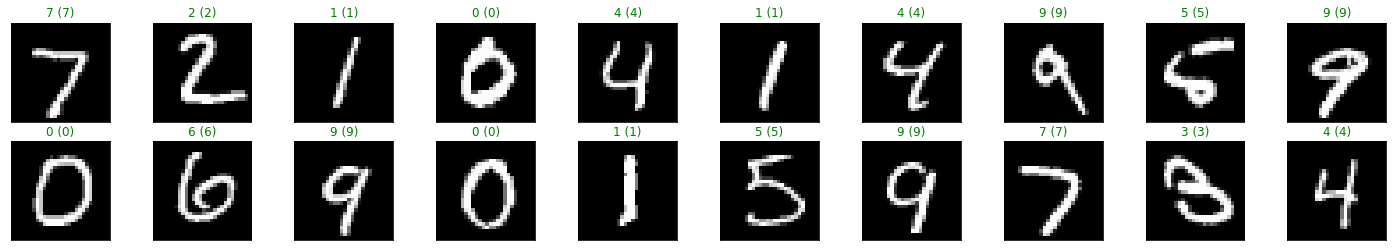

In [9]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))